In [16]:
#GENERAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split

#PATH PROCESS
import os
from pathlib import Path
import glob
from scipy.io import loadmat

# image processing
import cv2
from scipy.ndimage import gaussian_filter

# Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision

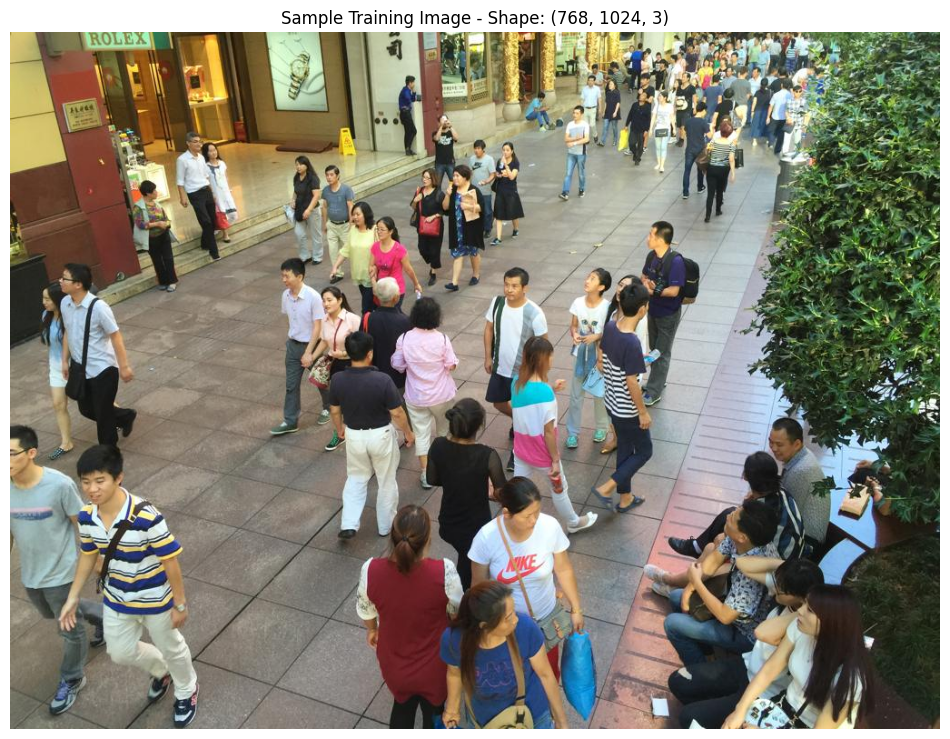

In [17]:
# -----------------------------
# Imports
# -----------------------------
import os
import cv2
import matplotlib.pyplot as plt

# -----------------------------
# Define dataset path
# -----------------------------
train_img_dir = r'data\ShanghaiTech\part_B\train_data\images'

# -----------------------------
# Example: Load and display a specific training image
# -----------------------------
path_img_ex = os.path.join(train_img_dir, 'IMG_7.jpg')  # specify image

image_ex = cv2.imread(path_img_ex)
if image_ex is None:
    print(f"Image not found: {path_img_ex}")
else:
    image_ex = cv2.cvtColor(image_ex, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12,12))
    plt.imshow(image_ex)
    plt.title(f"Sample Training Image - Shape: {image_ex.shape}")
    plt.axis('off')
    plt.show()


In [18]:
path_gt_ex = r'data\ShanghaiTech\part_B\train_data\ground-truth\GT_IMG_7.mat'
gt_ex = loadmat(path_gt_ex)
print('type: ', type(gt_ex))
print(gt_ex.items())

type:  <class 'dict'>
dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 18 19:55:34 2016'), ('__version__', '1.0'), ('__globals__', []), ('image_info', array([[array([[(array([[7.31950307e+01, 2.77897321e+02],
                       [4.53477024e+01, 2.94019458e+02],
                       [5.77518336e+00, 4.62569076e+02],
                       [9.95767101e+01, 4.97744649e+02],
                       [1.49408771e+02, 1.75301901e+02],
                       [2.05103428e+02, 1.22538542e+02],
                       [2.22691214e+02, 1.32798084e+02],
                       [3.19424038e+02, 1.50385870e+02],
                       [3.57530909e+02, 1.59179764e+02],
                       [3.15027092e+02, 2.70569076e+02],
                       [3.85378237e+02, 2.07546176e+02],
                       [4.13225565e+02, 2.20737015e+02],
                       [3.56065260e+02, 2.95485107e+02],
                       [3.80981290e+02, 3.45317168e+02],
          

In [19]:
gt_coor_ex = gt_ex.get('image_info')[0][0][0][0][0]
print('Shape of coordinates: ', gt_coor_ex.shape)
print(gt_coor_ex)


Shape of coordinates:  (118, 2)
[[7.31950307e+01 2.77897321e+02]
 [4.53477024e+01 2.94019458e+02]
 [5.77518336e+00 4.62569076e+02]
 [9.95767101e+01 4.97744649e+02]
 [1.49408771e+02 1.75301901e+02]
 [2.05103428e+02 1.22538542e+02]
 [2.22691214e+02 1.32798084e+02]
 [3.19424038e+02 1.50385870e+02]
 [3.57530909e+02 1.59179764e+02]
 [3.15027092e+02 2.70569076e+02]
 [3.85378237e+02 2.07546176e+02]
 [4.13225565e+02 2.20737015e+02]
 [3.56065260e+02 2.95485107e+02]
 [3.80981290e+02 3.45317168e+02]
 [4.19088160e+02 2.91088160e+02]
 [4.57195031e+02 3.11607244e+02]
 [4.96767550e+02 4.36187397e+02]
 [4.39607244e+02 5.47576710e+02]
 [5.27546176e+02 6.35515641e+02]
 [5.65653046e+02 5.19729382e+02]
 [8.20675947e+02 5.37317168e+02]
 [8.28004191e+02 4.86019458e+02]
 [8.51454573e+02 4.47912588e+02]
 [8.71973657e+02 6.06202664e+02]
 [9.11546176e+02 6.47240832e+02]
 [4.95301901e+02 1.66508008e+02]
 [4.61591977e+02 1.66508008e+02]
 [4.79179764e+02 1.02019458e+02]
 [5.14355336e+02 1.29866786e+02]
 [5.4659961

Text(0.5, 1.0, 'Image and Coordinate')

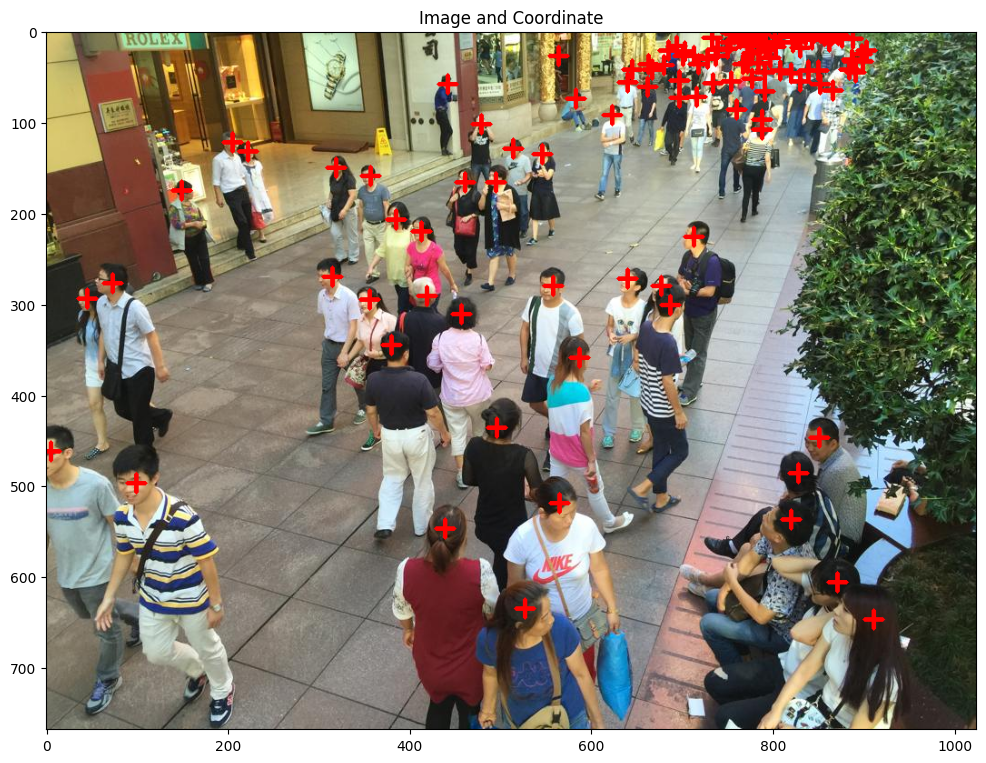

In [20]:
figure = plt.figure(figsize=(12,12))

for x_cor, y_cor in gt_coor_ex:
    cv2.drawMarker(image_ex, (int(x_cor), int(y_cor)),(255, 0, 0),thickness=3)

plt.imshow(image_ex)
plt.title("Image and Coordinate")

In [21]:
def gen_density_map_gaussian(image, coords, sigma=15):
    """
    Generate density map using Gaussian kernel
    
    Args:
        image: Input image (for shape reference)
        coords: List of (x, y) coordinates for head positions
        sigma: Standard deviation for Gaussian kernel
    
    Returns:
        density_map: Generated density map
    """
    # Create empty density map
    density_map = np.zeros(image.shape[:2], dtype=np.float32)
    
    # Return empty map if no coordinates
    if len(coords) == 0:
        return density_map
    
    # Create binary map with head positions
    for x, y in coords:
        # Ensure coordinates are within image bounds
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            density_map[int(y), int(x)] = 1
    
    # Apply Gaussian filter
    density_map = gaussian_filter(density_map, sigma=sigma, truncate=5)
    
    # Normalize to maintain total count (optional)
    # density_map = density_map * (len(coords) / (density_map.sum() + 1e-8))
    
    return density_map

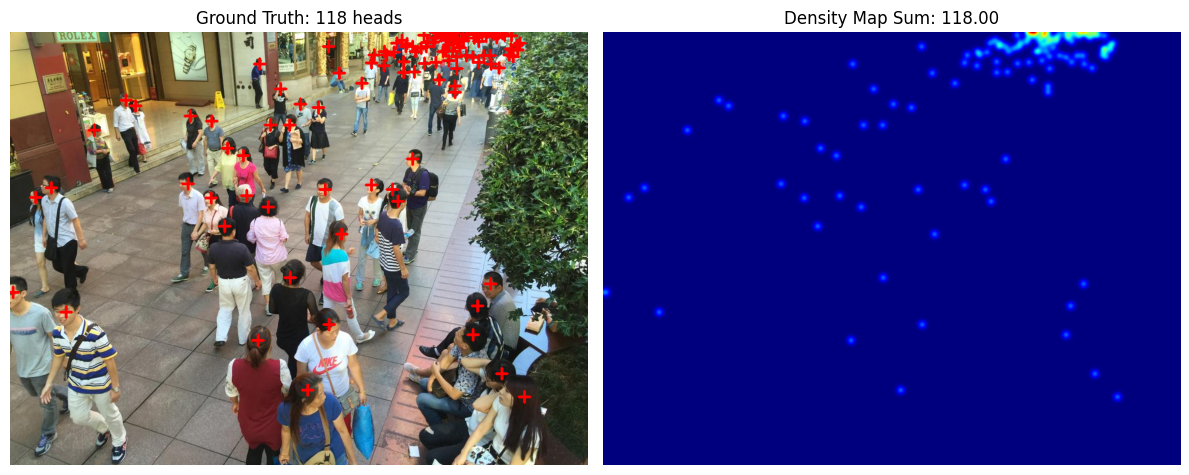


Value Ranges:
Image range: [0.000, 255.000]
Density map range: [0.000000, 0.029190]
Density map sum: 118.0000
Ground truth count: 118
Count difference: 0.0000


In [22]:
density_map_ex = gen_density_map_gaussian(image_ex, gt_coor_ex, 5)

figure = plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
# Convert to tensor and normalize (if needed)
if isinstance(image_ex, torch.Tensor):
    image_display = image_ex.numpy()
else:
    image_display = image_ex / 255.0
    
plt.imshow(image_display)
plt.xlabel(f'Shape: {image_ex.shape}')
plt.title(f'Ground Truth: {len(gt_coor_ex)} heads')
plt.axis('off')  # Cleaner visualization

# Density map
plt.subplot(1, 2, 2)
density_display = plt.imshow(density_map_ex, cmap="jet")
plt.xlabel(f'Shape: {density_map_ex.shape}')
plt.title(f'Density Map Sum: {np.sum(density_map_ex):.2f}')
plt.axis('off')


plt.tight_layout()
plt.show()

print('\nValue Ranges:')
print(f'Image range: [{image_ex.min():.3f}, {image_ex.max():.3f}]')
print(f'Density map range: [{density_map_ex.min():.6f}, {density_map_ex.max():.6f}]')
print(f'Density map sum: {np.sum(density_map_ex):.4f}')
print(f'Ground truth count: {len(gt_coor_ex)}')
print(f'Count difference: {abs(np.sum(density_map_ex) - len(gt_coor_ex)):.4f}')

In [23]:
import random
import torch
import torch.nn.functional as F

def apply_augmentation(img_tensor, density_tensor):
    """
    Apply multiple augmentations to image and density map
    """
    # 1. Horizontal Flip (50% chance)
    if random.random() > 0.5:
        img_tensor = img_tensor.flip(2)  # Flip width
        density_tensor = density_tensor.flip(2)
    
    # 2. Color Jitter (30% chance)
    if random.random() > 0.7:
        # Brightness
        brightness = random.uniform(0.8, 1.2)
        img_tensor = img_tensor * brightness
        img_tensor = torch.clamp(img_tensor, 0, 1)
        
        # Contrast
        contrast = random.uniform(0.8, 1.2)
        mean = img_tensor.mean()
        img_tensor = (img_tensor - mean) * contrast + mean
        img_tensor = torch.clamp(img_tensor, 0, 1)
    
    # 3. Small Rotation (20% chance)
    if random.random() > 0.8:
        angle = random.uniform(-10, 10)
        
        # Rotate image
        img_tensor = F.interpolate(img_tensor.unsqueeze(0), scale_factor=2, mode='bilinear')
        img_tensor = F.affine(img_tensor, angle=angle, translate=[0, 0], scale=1.0, shear=0)
        img_tensor = F.interpolate(img_tensor, scale_factor=0.5, mode='bilinear')
        img_tensor = img_tensor.squeeze(0)
        
        # Rotate density map
        density_tensor = F.interpolate(density_tensor.unsqueeze(0), scale_factor=2, mode='bilinear')
        density_tensor = F.affine(density_tensor, angle=angle, translate=[0, 0], scale=1.0, shear=0)
        density_tensor = F.interpolate(density_tensor, scale_factor=0.5, mode='bilinear')
        density_tensor = density_tensor.squeeze(0)
    
    # 4. Gaussian Noise (20% chance)
    if random.random() > 0.8:
        noise = torch.randn_like(img_tensor) * 0.05
        img_tensor = img_tensor + noise
        img_tensor = torch.clamp(img_tensor, 0, 1)
    
    return img_tensor, density_tensor

In [25]:
class CrowdCountingDataset(Dataset):
    def __init__(self, root_dir, gt_downsample=4, shuffle=False, augment=False):  # Changed transform to augment
        self.root_dir = root_dir
        self.gt_downsample = gt_downsample
        self.shuffle = shuffle
        self.augment = augment  # Use augment instead of transform

        # Get image files
        images_dir = os.path.join(root_dir, 'images')
        self.img_names = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
        
        if self.shuffle:
            random.shuffle(self.img_names)
        
        self.data = []
        for img_name in self.img_names:
            img_path = os.path.join(images_dir, img_name)
            
            # Load ground truth
            gt_filename = 'GT_' + os.path.splitext(img_name)[0] + '.mat'
            gt_path = os.path.join(root_dir, 'ground-truth', gt_filename)
            
            try:
                gt_data = loadmat(gt_path)
                gt_coords = gt_data['image_info'][0][0][0][0][0]
                
                # Load image
                img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
                
                if img is None:
                    print(f"Warning: Could not load image {img_path}")
                    continue
                
                self.data.append({
                    'img_path': img_path,
                    'img_name': img_name,
                    'gt_coords': gt_coords,
                    'n_people': gt_coords.shape[0]
                })
                
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
                continue

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        
        # Load image
        img = cv2.cvtColor(cv2.imread(item['img_path']), cv2.COLOR_BGR2RGB)
        
        # Generate density map on-the-fly
        gt_density_map = gen_density_map_gaussian(img, item['gt_coords'], sigma=5)
        
        # Handle grayscale images
        if len(img.shape) == 2:
            img = np.stack([img] * 3, axis=-1)
        
        # Downsample
        ds_rows = img.shape[0] // self.gt_downsample
        ds_cols = img.shape[1] // self.gt_downsample
        
        # Resize image and density map
        img = cv2.resize(img, (ds_cols * self.gt_downsample, ds_rows * self.gt_downsample))
        gt_density_map = cv2.resize(gt_density_map, (ds_cols, ds_rows))
        
        # Scale density map to account for downsampling
        gt_density_map = gt_density_map[np.newaxis, :, :] * (self.gt_downsample * self.gt_downsample)
        
        # Convert to tensor
        img_tensor = torch.tensor(img.transpose(2, 0, 1) / 255.0, dtype=torch.float)
        dm_tensor = torch.tensor(gt_density_map, dtype=torch.float)
        
        # APPLY AUGMENTATION HERE (to both image and density map)
        if self.augment:
            img_tensor, dm_tensor = apply_augmentation(img_tensor, dm_tensor)  
        
        return img_tensor, dm_tensor, item['n_people']

In [26]:
root_dir = r'data\ShanghaiTech\part_B\train_data'
dataset = CrowdCountingDataset(root_dir, gt_downsample=4, shuffle=True)

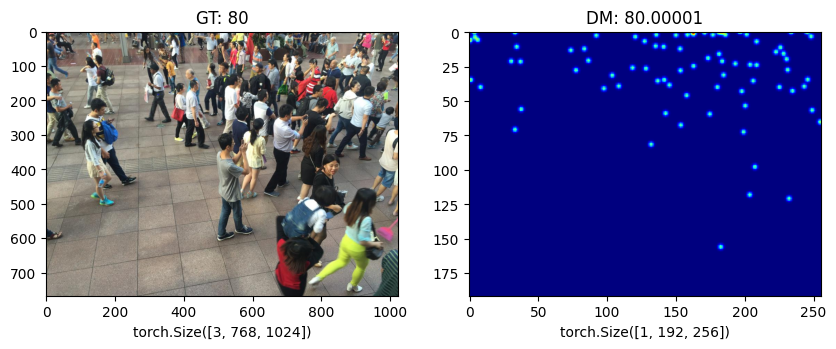

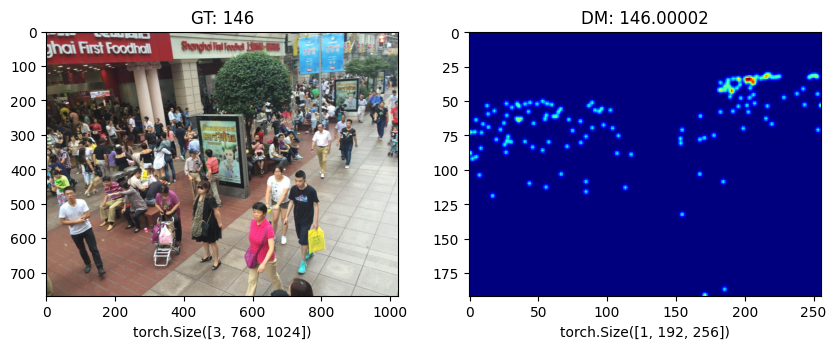

In [27]:
for i, (img, gt_dmap, n_people) in enumerate(dataset):
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.xlabel(img.shape)
  plt.title('GT: ' + str(n_people))
  plt.imshow(img.permute(1, 2, 0))

  plt.subplot(1,2,2)
  plt.xlabel(gt_dmap.shape)
  plt.title('DM: ' + str(np.sum(gt_dmap.numpy())))
  plt.imshow(gt_dmap.permute(1, 2, 0), cmap="jet")
  plt.show()

  if i > 0:
    #print('type of img: ', type(img))
    #print('type of dmap: ', type(gt_dmap))
    #print('shape of img: ', img.shape)
    break


In [28]:
# Train with augmentation
train_dataset = CrowdCountingDataset(
    root_dir=r'data\ShanghaiTech\part_B\train_data',
    gt_downsample=4,
    shuffle=True,
    augment=True  # Augmentation ON
)

# Test without augmentation  
test_dataset = CrowdCountingDataset(
    root_dir=r'data\ShanghaiTech\part_B\test_data',
    gt_downsample=4,
    shuffle=False, 
    augment=False  # Augmentation OFF
)

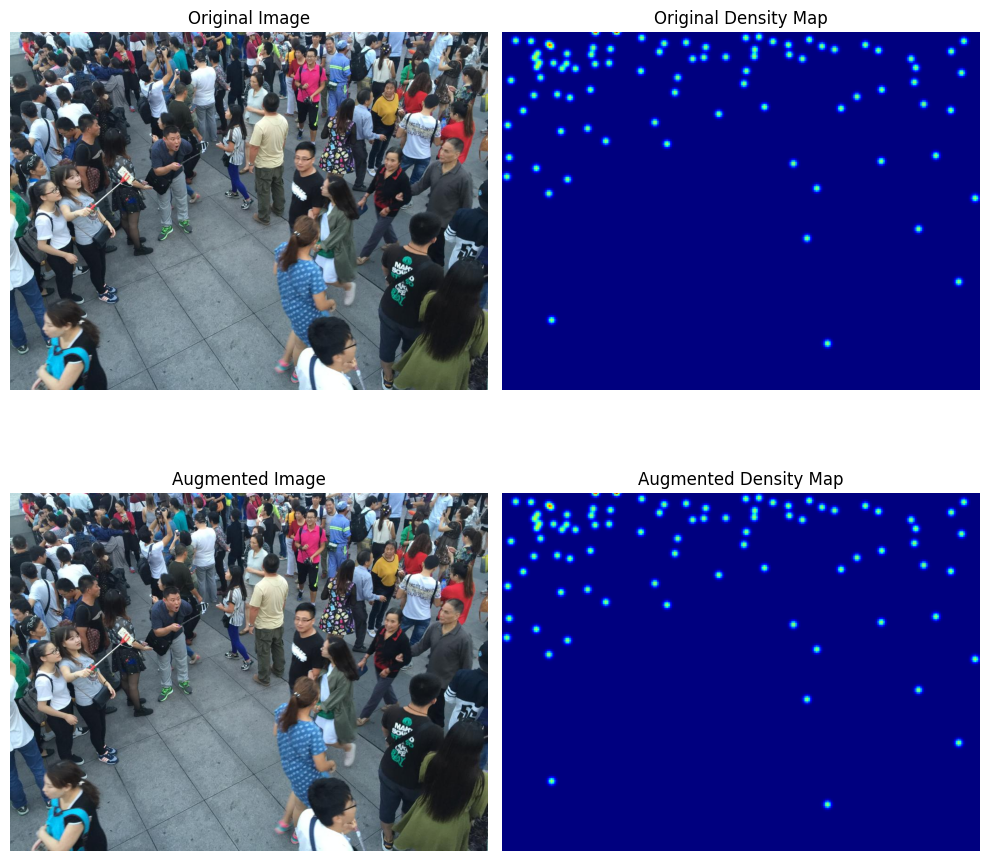

Random Image Index: 63
Ground truth count: 87
Original density sum: 87.00
Augmented density sum: 87.00


In [29]:
import random

def display_augmentation_comparison(dataset):
    """
    Show original vs augmented version of a random image
    """
    # Get random index
    index = random.randint(0, len(dataset) - 1)
    
    # Create a temporary dataset without augmentation for comparison
    from copy import deepcopy
    temp_dataset_no_aug = deepcopy(dataset)
    temp_dataset_no_aug.augment = False
    
    # Get original (no augmentation)
    orig_img, orig_dm, count = temp_dataset_no_aug[index]
    
    # Get augmented version
    aug_img, aug_dm, count = dataset[index]
    
    # Convert to numpy for display
    orig_img_np = orig_img.numpy().transpose(1, 2, 0)
    orig_dm_np = orig_dm.numpy().squeeze()
    
    aug_img_np = aug_img.numpy().transpose(1, 2, 0)
    aug_dm_np = aug_dm.numpy().squeeze()
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    # Original image
    axes[0, 0].imshow(orig_img_np)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    # Original density map
    axes[0, 1].imshow(orig_dm_np, cmap='jet')
    axes[0, 1].set_title('Original Density Map')
    axes[0, 1].axis('off')
    
    # Augmented image
    axes[1, 0].imshow(aug_img_np)
    axes[1, 0].set_title('Augmented Image')
    axes[1, 0].axis('off')
    
    # Augmented density map
    axes[1, 1].imshow(aug_dm_np, cmap='jet')
    axes[1, 1].set_title('Augmented Density Map')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Random Image Index: {index}")
    print(f"Ground truth count: {count}")
    print(f"Original density sum: {orig_dm.sum().item():.2f}")
    print(f"Augmented density sum: {aug_dm.sum().item():.2f}")

# Usage - make sure your dataset has augment=True
dataset_aug = CrowdCountingDataset(root_dir, augment=True)

# Run multiple times to see different random images with different augmentations
display_augmentation_comparison(dataset_aug)

In [31]:
class MC_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # ---------------- Column 1 ----------------
        # Column 1: uses larger kernels (9x9, 7x7) to capture large-scale features (big heads)
        # Layers in column1: Conv, ReLU, MaxPool, Conv, ReLU, MaxPool, Conv, ReLU, Conv, ReLU, Conv, ReLU
        # Total layers = 12 (Conv+ReLU+MaxPool counted separately)
        self.column1 = nn.Sequential(
            nn.Conv2d(3, 8, 9, padding='same'),   # Conv1
            nn.ReLU(),                             # ReLU1
            nn.MaxPool2d(2),                       # MaxPool1
            nn.Conv2d(8, 16, 7, padding='same'),  # Conv2
            nn.ReLU(),                             # ReLU2
            nn.MaxPool2d(2),                       # MaxPool2
            nn.Conv2d(16, 32, 7, padding='same'), # Conv3
            nn.ReLU(),                             # ReLU3
            nn.Conv2d(32, 16, 7, padding='same'), # Conv4
            nn.ReLU(),                             # ReLU4
            nn.Conv2d(16, 8, 7, padding='same'),  # Conv5
            nn.ReLU(),                             # ReLU5
        )

        # ---------------- Column 2 ----------------
        # Column 2: medium kernels (7x7,5x5) to capture medium-scale features (medium heads)
        # Layers = 12 (Conv+ReLU+MaxPool counted separately)
        self.column2 = nn.Sequential(
            nn.Conv2d(3, 10, 7,padding='same'),   # Conv1
            nn.ReLU(),                             # ReLU1
            nn.MaxPool2d(2),                       # MaxPool1
            nn.Conv2d(10, 20, 5,padding='same'),  # Conv2
            nn.ReLU(),                             # ReLU2
            nn.MaxPool2d(2),                       # MaxPool2
            nn.Conv2d(20, 40, 5,padding='same'),  # Conv3
            nn.ReLU(),                             # ReLU3
            nn.Conv2d(40, 20, 5,padding='same'),  # Conv4
            nn.ReLU(),                             # ReLU4
            nn.Conv2d(20, 10, 5,padding='same'),  # Conv5
            nn.ReLU(),                             # ReLU5
        )

        # ---------------- Column 3 ----------------
        # Column 3: smaller kernels (5x5,3x3) to capture small-scale features (small heads)
        # Layers = 12 (Conv+ReLU+MaxPool counted separately)
        self.column3 = nn.Sequential(
            nn.Conv2d(3, 12, 5, padding='same'),  # Conv1
            nn.ReLU(),                             # ReLU1
            nn.MaxPool2d(2),                       # MaxPool1
            nn.Conv2d(12, 24, 3, padding='same'), # Conv2
            nn.ReLU(),                             # ReLU2
            nn.MaxPool2d(2),                       # MaxPool2
            nn.Conv2d(24, 48, 3, padding='same'), # Conv3
            nn.ReLU(),                             # ReLU3
            nn.Conv2d(48, 24, 3, padding='same'), # Conv4
            nn.ReLU(),                             # ReLU4
            nn.Conv2d(24, 12, 3, padding='same'), # Conv5
            nn.ReLU(),                             # ReLU5
        )
        
        # ---------------- Fusion Layer ----------------
        # Fuses the outputs of 3 columns (8+10+12=30 channels) into 1-channel density map
        # Layers = 1 (Conv only)
        self.fusion_layer = nn.Sequential(
            nn.Conv2d(30, 1, 1, padding=0),       # Conv fusion
            #nn.ReLU()
        )

    def forward(self,img_tensor):
        x1 = self.column1(img_tensor)  # Output from column1
        x2 = self.column2(img_tensor)  # Output from column2
        x3 = self.column3(img_tensor)  # Output from column3
        x = torch.cat((x1, x2, x3),1)  # Concatenate along channels
        x = self.fusion_layer(x)        # Fuse into single density map
        return x


In [32]:
img=torch.rand((1,3,768,1024),dtype=torch.float)
mcnn=MC_CNN()
out_dmap=mcnn(img)
print(out_dmap.shape)

torch.Size([1, 1, 192, 256])


In [33]:
batch_size = 8
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

train_root_dir = r'data\ShanghaiTech\part_B\train_data'
init_training_set = CrowdCountingDataset(train_root_dir, gt_downsample=4, shuffle=True)

# split part of the training set as validation set
train_size = int(0.9 * len(init_training_set))
val_size = len(init_training_set) - train_size

train_indices = list(range(train_size))
val_indices = list(range(train_size, len(init_training_set)))
train_dataset = torch.utils.data.dataset.Subset(init_training_set, train_indices)
val_dataset = torch.utils.data.dataset.Subset(init_training_set, val_indices)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_root_dir = r'data\ShanghaiTech\part_B\test_data'
test_set = CrowdCountingDataset(test_root_dir, gt_downsample=4, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

print("Number of batches in train_loader:", len(train_loader))
print("Number of batches in val_loader:", len(val_loader))
print("Number of batches in test_loader:", len(test_loader))

Number of batches in train_loader: 45
Number of batches in val_loader: 5
Number of batches in test_loader: 40


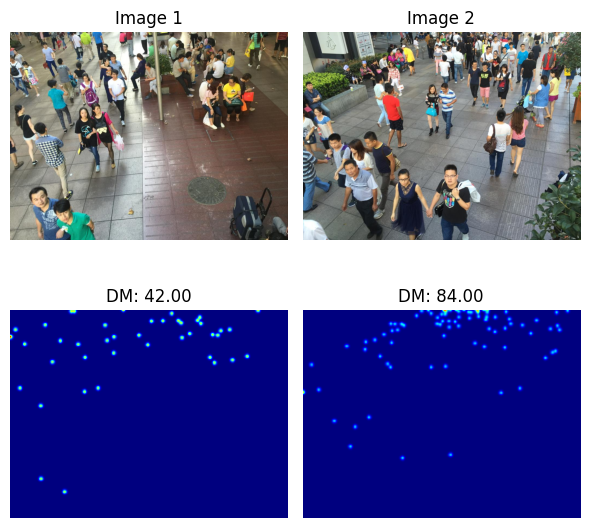

In [18]:
def plot_corresponding_pairs(batch1, batch2, plot_map='jet'):
    num_images = min(2, batch1.shape[0])  # Only take 2 images max
    
    # Create subplots: 2 rows (image + density map) x 2 columns
    fig, axes = plt.subplots(2, num_images, figsize=(3*num_images, 6))
    
    # Handle case when there's only 1 image
    if num_images == 1:
        axes = axes.reshape(2, 1)
    
    for i in range(num_images):
        # Plot image (batch1)
        axes[0, i].imshow(batch1[i].permute(1, 2, 0))
        axes[0, i].axis('off')
        axes[0, i].set_title(f'Image {i+1}')
        
        # Plot density map (batch2)
        axes[1, i].imshow(batch2[i].squeeze().detach().numpy(), cmap=plot_map)
        axes[1, i].axis('off')
        axes[1, i].set_title(f'DM: {batch2[i].sum().item():.2f}')
    
    plt.tight_layout()
    plt.show()

# Usage example:
for images, density_maps, counts in train_loader:
    plot_corresponding_pairs(images, density_maps)
    break  # Only plot first batch

In [34]:
class CombinedLoss(nn.Module):
    def __init__(self, weight_dmap=0.8, weight_sum_gt=0.2):
        super().__init__()
        self.weight_dmap = weight_dmap
        self.weight_sum_gt = weight_sum_gt
        self.img_loss = nn.MSELoss()
        self.gt_loss_mse = nn.MSELoss()
        self.gt_loss_mae = nn.L1Loss()

    def forward(self, logits, batch_dmap, batch_gts):
        batch_gts = batch_gts.float()
        img_loss = self.img_loss(logits, batch_dmap)
        gt_loss_mae = self.gt_loss_mae(torch.squeeze(logits.sum(dim=(2,3))), batch_gts)
        gt_loss_mse = self.gt_loss_mse(torch.squeeze(logits.sum(dim=(2,3))), batch_gts)
        
        #print('logits : ', torch.squeeze(logits.sum(dim=(2,3))))
        #print('gts    : ', batch_gts)
        #print('MAE:  ', gt_loss_mae)
        
        combined_loss = self.weight_dmap * img_loss + self.weight_sum_gt * gt_loss_mae
        return combined_loss, gt_loss_mae

In [27]:
num_epochs = 100
train_losses = []
val_losses = []
train_mae_losses = []
val_mae_losses = []

model = MC_CNN().to(device)
criterion = CombinedLoss(0.5, 0.5)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# FIXED: Added min_lr=1e-6 to prevent learning rate from going to zero
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, min_lr=1e-6
)

best_val_loss = np.inf
best_nr_epoch = 0

print("Starting Training...")
print("=" * 60)

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 40)

    # Training phase
    model.train()
    tr_loss_acc = 0.0
    tr_loss_mae_acc = 0.0

    for batch_img, batch_dmap, batch_gts in train_loader:
        batch_img, batch_dmap, batch_gts = batch_img.to(device), batch_dmap.to(device), batch_gts.to(device)
        
        # Forward pass
        logits = model(batch_img)
        loss, mae_loss = criterion(logits, batch_dmap, batch_gts)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        tr_loss_acc += loss.item()
        tr_loss_mae_acc += mae_loss.item()

    # Calculate average training losses
    tr_loss = tr_loss_acc / len(train_loader)
    tr_mae = tr_loss_mae_acc / len(train_loader)
    
    print(f"Train Loss:    {tr_loss:10.4f}")
    print(f"Train MAE:     {tr_mae:10.4f}")
    
    # Validation phase
    model.eval()
    with torch.inference_mode():
        val_loss_acc = 0.0
        val_loss_mae_acc = 0.0
        
        for batch_img_val, batch_dmap_val, batch_gts_val in val_loader:
            batch_img_val, batch_dmap_val, batch_gts_val = batch_img_val.to(device), batch_dmap_val.to(device), batch_gts_val.to(device)

            logits = model(batch_img_val)
            loss, mae_loss = criterion(logits, batch_dmap_val, batch_gts_val)

            val_loss_acc += loss.item()
            val_loss_mae_acc += mae_loss.item()

    # Calculate average validation losses
    val_loss = val_loss_acc / len(val_loader)
    val_mae = val_loss_mae_acc / len(val_loader)
    
    print(f"Val Loss:      {val_loss:10.4f}")
    print(f"Val MAE:       {val_mae:10.4f}")

    # Learning rate scheduling
    scheduler.step(val_mae)
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate: {current_lr:10.6f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_nr_epoch = epoch
        torch.save(model.state_dict(), './crowd_counting.pth')
        print("✓ New best model saved!")

    train_losses.append(tr_loss)
    train_mae_losses.append(tr_mae)
    val_losses.append(val_loss)
    val_mae_losses.append(val_mae)

print("=" * 60)
print("\nTraining Completed!")
print(f"Best Model - Epoch {best_nr_epoch+1}:")
print(f"Best Train MAE: {train_mae_losses[best_nr_epoch]:.4f}")
print(f"Best Val MAE:   {val_mae_losses[best_nr_epoch]:.4f}")

Starting Training...

Epoch 1/100
----------------------------------------
Train Loss:     1071.9189
Train MAE:      2143.8294
Val Loss:        183.6980
Val MAE:         367.3957
Learning Rate:   0.001000
✓ New best model saved!

Epoch 2/100
----------------------------------------
Train Loss:      187.7006
Train MAE:       375.4009
Val Loss:        425.3126
Val MAE:         850.6245
Learning Rate:   0.001000

Epoch 3/100
----------------------------------------
Train Loss:      111.9838
Train MAE:       223.9673
Val Loss:         34.8792
Val MAE:          69.7580
Learning Rate:   0.001000
✓ New best model saved!

Epoch 4/100
----------------------------------------
Train Loss:      197.5497
Train MAE:       395.0991
Val Loss:         47.6652
Val MAE:          95.3302
Learning Rate:   0.001000

Epoch 5/100
----------------------------------------
Train Loss:       87.9361
Train MAE:       175.8719
Val Loss:         58.4471
Val MAE:         116.8938
Learning Rate:   0.001000

Epoch 6/10

In [21]:
import torch
from torch.utils.data import DataLoader

# Assuming MC_CNN model definition is already loaded in the environment
model = MC_CNN()

# Load the pre-trained weights
model.load_state_dict(torch.load('crowd_counting.pth'))
model.eval()  # Set the model to evaluation mode


C:\Users\thoma\AppData\Local\Temp\ipykernel_26404\614716159.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('crowd_counting.pth'))


MC_CNN(
  (column1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(9, 9), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=same)
    (7): ReLU()
    (8): Conv2d(32, 16, kernel_size=(7, 7), stride=(1, 1), padding=same)
    (9): ReLU()
    (10): Conv2d(16, 8, kernel_size=(7, 7), stride=(1, 1), padding=same)
    (11): ReLU()
  )
  (column2): Sequential(
    (0): Conv2d(3, 10, kernel_size=(7, 7), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

In [35]:
import torch
import numpy as np

def evaluate_model(model, data_loader, device):
    """
    Evaluate the model on a given data loader and return MAE, MSE, RMSE.
    """
    model.eval()
    maes = []
    mses = []

    with torch.no_grad():
        for images, density_maps, counts in data_loader:
            images, density_maps, counts = images.to(device), density_maps.to(device), counts.to(device)
            
            preds = model(images)
            pred_counts = preds.sum(dim=(1, 2, 3))
            
            # MAE
            mae = torch.abs(pred_counts - counts)
            maes.extend(mae.cpu().numpy())
            
            # MSE
            mse = (pred_counts - counts) ** 2
            mses.extend(mse.cpu().numpy())
    
    mae_val = np.mean(maes)
    mse_val = np.mean(mses)
    rmse_val = np.sqrt(mse_val)

    return mae_val, mse_val, rmse_val

# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = MC_CNN().to(device)

# Load model without warning - use weights_only=True
model.load_state_dict(torch.load('./crowd_counting.pth', map_location=device, weights_only=True))
model.eval()

print("=" * 60)
print("MODEL EVALUATION RESULTS")
print("=" * 60)

# Evaluate on all datasets
train_mae, train_mse, train_rmse = evaluate_model(model, train_loader, device)
val_mae, val_mse, val_rmse = evaluate_model(model, val_loader, device)
test_mae, test_mse, test_rmse = evaluate_model(model, test_loader, device)

print(f"\nTraining Set:")
print(f"  MAE:  {train_mae:>8.2f}")
print(f"  MSE:  {train_mse:>8.2f}")
print(f"  RMSE: {train_rmse:>8.2f}")

print(f"\nValidation Set:")
print(f"  MAE:  {val_mae:>8.2f}")
print(f"  MSE:  {val_mse:>8.2f}")
print(f"  RMSE: {val_rmse:>8.2f}")

print(f"\nTest Set:")
print(f"  MAE:  {test_mae:>8.2f}")
print(f"  MSE:  {test_mse:>8.2f}")
print(f"  RMSE: {test_rmse:>8.2f}")

print("\n" + "=" * 60)

Using device: cuda
MODEL EVALUATION RESULTS

Training Set:
  MAE:     48.13
  MSE:   5205.51
  RMSE:    72.15

Validation Set:
  MAE:     56.36
  MSE:   7984.82
  RMSE:    89.36

Test Set:
  MAE:     50.88
  MSE:   6373.35
  RMSE:    79.83



In [17]:
# def visualize_predictions(model, test_loader, num_samples=3):
#     model.eval()
#     with torch.no_grad():
#         for i, (images, density_maps, counts) in enumerate(test_loader):
#             if i >= num_samples:
#                 break
#             images, density_maps, counts = images.to(device), density_maps.to(device), counts.to(device)
#             preds = model(images)
            
#             for j in range(images.shape[0]):
#                 if j >= 2:  # Show max 2 per batch
#                     break
                    
#                 fig, axes = plt.subplots(1, 3, figsize=(15, 5))
                
#                 # Original image
#                 img_np = images[j].cpu().numpy().transpose(1, 2, 0)
#                 axes[0].imshow(img_np)
#                 axes[0].set_title(f'Image (GT: {counts[j].item():.0f})')
#                 axes[0].axis('off')
                
#                 # Ground truth density
#                 gt_dm = density_maps[j].squeeze().cpu().numpy()
#                 axes[1].imshow(gt_dm, cmap='jet')
#                 axes[1].set_title('GT Density Map')
#                 axes[1].axis('off')
                
#                 # Predicted density
#                 pred_dm = preds[j].squeeze().cpu().numpy()
#                 pred_count = pred_dm.sum()
#                 axes[2].imshow(pred_dm, cmap='jet')
#                 axes[2].set_title(f'Pred Density (Count: {pred_count:.1f})')
#                 axes[2].axis('off')
                
#                 plt.tight_layout()
#                 plt.show()

# visualize_predictions(model, test_loader)

In [36]:
import sys
import os
import cv2
import torch

# -----------------------------
# Add scripts folder to Python path
# -----------------------------
scripts_path = os.path.abspath("scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# -----------------------------
# Import model class
# -----------------------------
from crowd_model import MC_CNN  # Make sure crowd_model.py is in scripts/

# -----------------------------
# Settings
# -----------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_path = r"crowd_counting.pth"  # path to your trained model
input_size = (768, 1024)  # height x width used during training

# -----------------------------
# Load model
# -----------------------------
model = MC_CNN().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# -----------------------------
# Load and preprocess image
# -----------------------------
image_path = r'C:\ajay\CrowdCtrl\data\ShanghaiTech\part_B\test_data\images\IMG_163.jpg'
image = cv2.imread(image_path)
original_h, original_w = image.shape[:2]

# Resize to model training size
image_resized = cv2.resize(image, (input_size[1], input_size[0]))  # width x height
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Convert to tensor
img_tensor = torch.from_numpy(image_rgb.transpose(2, 0, 1)).unsqueeze(0).float().to(device)
img_tensor /= 255.0  # normalize if done during training

# -----------------------------
# Predict density map and crowd count
# -----------------------------
with torch.no_grad():
    density_map = model(img_tensor)
    # Scale sum back to original image size
    pred_count = density_map.sum().item() * (original_h * original_w) / (input_size[0] * input_size[1])

# Round and print
pred_count = max(0, int(pred_count))
print(f"Predicted crowd count: {pred_count}")


Predicted crowd count: 84


C:\Users\thoma\AppData\Local\Temp\ipykernel_2644\3936511059.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=de

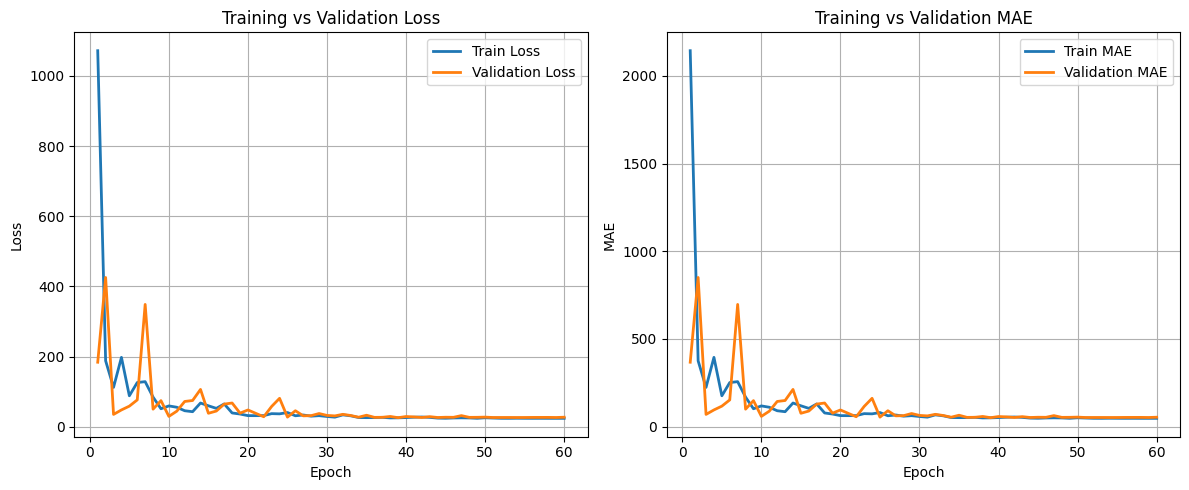

In [3]:
import matplotlib.pyplot as plt

# --- Training & Validation metrics ---
epochs = list(range(1, 61))

train_loss = [
1071.9189,187.7006,111.9838,197.5497,87.9361,125.7510,128.2649,84.1756,50.9995,59.1025,
55.2838,45.3457,42.6073,67.3635,59.4468,52.1308,64.7288,38.9987,35.9560,31.4063,
31.3371,31.4559,37.0651,36.4727,40.2140,30.9979,33.1898,29.8826,31.2695,28.9288,
27.0661,33.5449,30.8880,25.9930,25.6959,25.8980,26.5224,24.9055,25.1378,25.8964,
26.8573,27.4619,26.3867,24.3419,23.9038,24.7306,25.1413,24.8196,23.7858,25.2911,
24.5166,23.8319,23.7395,23.9839,23.8299,23.7331,23.7707,23.6989,23.6680,23.7026
]

val_loss = [
183.6980,425.3126,34.8792,47.6652,58.4471,76.2718,348.4785,49.8090,74.1835,29.2629,
44.0977,71.7892,74.5267,106.1412,38.1080,44.4646,64.2893,67.3716,38.4587,47.5527,
37.8243,28.2191,57.6329,80.7563,27.1395,45.3294,30.8030,31.3933,37.3856,31.9871,
30.6506,35.1026,31.7721,26.8634,32.5201,26.4684,26.6159,29.0132,25.5335,28.8317,
27.7163,26.0293,28.4548,26.0742,26.7915,26.6375,31.4212,26.4666,26.6033,27.1366,
26.0411,26.1010,26.1300,26.0168,26.0803,26.2884,26.3279,26.3560,26.0854,26.8779
]

train_mae = [
2143.8294,375.4009,223.9673,395.0991,175.8719,251.5018,256.5295,168.3510,101.9987,118.2047,
110.5674,90.6911,85.2143,134.7267,118.8933,104.2613,129.4573,77.9972,71.9117,62.8123,
62.6740,62.9116,74.1299,72.9451,80.4277,61.9956,66.3793,59.7650,62.5388,57.8575,
54.1319,67.0895,61.7758,51.9858,51.3916,51.7957,53.0446,49.8108,50.2753,51.7925,
53.7143,54.9235,52.7732,48.6836,47.8073,49.4610,50.2824,49.6390,47.5713,50.5819,
49.0331,47.6636,47.4788,47.9676,47.6596,47.4660,47.5412,47.3975,47.3358,47.4050
]

val_mae = [
367.3957,850.6245,69.7580,95.3302,116.8938,152.5433,696.9565,99.6178,148.3667,58.5256,
88.1952,143.5781,149.0531,212.2820,76.2156,88.9289,128.5784,134.7429,76.9171,95.1051,
75.6483,56.4379,115.2656,161.5124,54.2788,90.6585,61.6057,62.7862,74.7709,63.9739,
61.3008,70.2050,63.5439,53.7265,65.0400,52.9365,53.2315,58.0262,51.0668,57.6632,
55.4324,52.0584,56.9094,52.1481,53.5827,53.2748,62.8421,52.9330,53.2062,54.2730,
52.0818,52.2018,52.2598,52.0333,52.1604,52.5765,52.6555,52.7117,52.1706,53.7555
]

# --- Plotting ---

plt.figure(figsize=(12, 5))

# Plot 1: Loss curves
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: MAE curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, label='Train MAE', linewidth=2)
plt.plot(epochs, val_mae, label='Validation MAE', linewidth=2)
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
